#### Please import the Boston housing dataset, do some EDA, and clean data. Then calculate linear regression. After that please use Polynomial Regression. Calculate RMSE and R squared for each. Please use sklearn to implement Linear Regression
- dataset: http://lib.stat.cmu.edu/datasets/boston
- publication: http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.926.5532&rep=rep1&type=pdf

 ❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤

Variables in order:
 - CRIM: per capita crime rate by town
 - ZN:       proportion of residential land zoned for lots over 25,000 sq.ft.
 - INDUS:    proportion of non-retail business acres per town
 - CHAS:     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 - NOX:      nitric oxides concentration (parts per 10 million)
 - RM:       average number of rooms per dwelling
 - AGE:      proportion of owner-occupied units built prior to 1940
 - DIS:      weighted distances to five Boston employment centres
 - RAD:      index of accessibility to radial highways
 - TAX:      full-value property-tax rate per 10,000 dollars
 - PTRATIO:  pupil-teacher ratio by town
 - B:        1000 (Bk - 0.63)^2 where Bk is the proportion of blacks by town
 - LSTAT:    percent lower status of the population
 - MEDV:     Median value of owner-occupied homes in 1000 dollars

---
# 1) Import Packages and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')  # to ignore seaborn warnings

plt.style.use('classic')
%matplotlib inline
pd.set_option('display.max_columns', 100)

In [2]:
# Option 1: import dataset from sklearn (as dictionary) --> lacks the 'medv' column

# from sklearn.datasets import load_boston
# boston = load_boston()
# df = pd.DataFrame(boston.data, columns=list(boston.feature_names))
# df.columns = map(str.lower, df.columns)  # or: df.columns = [x.lower() for x in df.columns]
# df.head(2)

In [3]:
# Option 2: load via github link

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
df.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [4]:
# do a quick check of the number of rows (observations) and columns (features) in the dataset
df.shape

(506, 14)

---
# 2) Data Cleaning

Let us first have a brief look at the data set before we start cleaning the data.

In [5]:
df.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [6]:
df.tail(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [7]:
# check data types of columns --> all float or int
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [8]:
# check if float or int are appropriate data types for the features
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
df.chas.value_counts()  # Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
                        # take care to interpret it as a categorical (dummy) variable

0    471
1     35
Name: chas, dtype: int64

In [10]:
df.rad.value_counts().sort_index()
   # index of accessibility to radial highways (larger index denotes better accessibility)
   # ToDo: find out if it is in interval scale

1      20
2      24
3      38
4     110
5     115
6      26
7      17
8      24
24    132
Name: rad, dtype: int64

In [11]:
# check for missing data --> no missing data!
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [12]:
# check for duplicates --> no duplicates!
any(df.duplicated())

False

---
# 3) Data Exploration and Visualization

In [ ]:
# overview of all features
# pd.plotting.scatter_matrix(df, figsize=(17, 10), edgecolor='none', alpha=0.5);

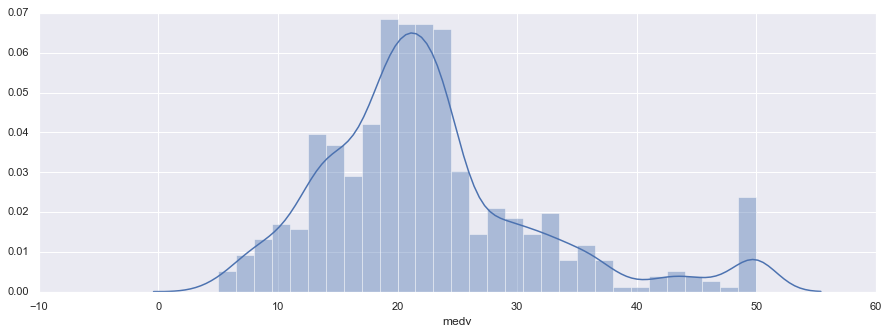

In [13]:
# dependent variable distribution
import seaborn as sns
sns.set(rc={'figure.figsize':(15,5)})
sns.distplot(df.medv, bins=30)
plt.show()

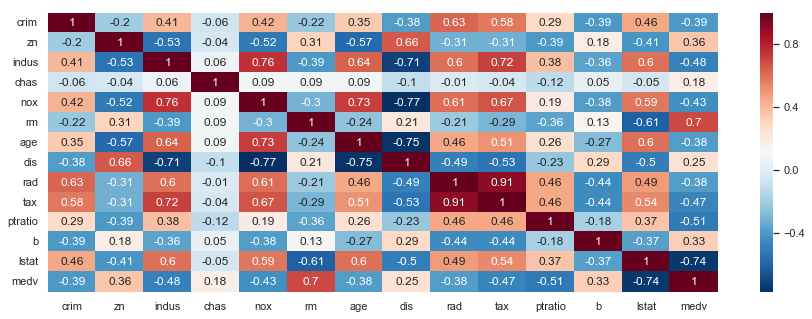

In [14]:
# heatmap (correlation matrix)
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='RdBu_r'); # annot = True to print the values inside the square

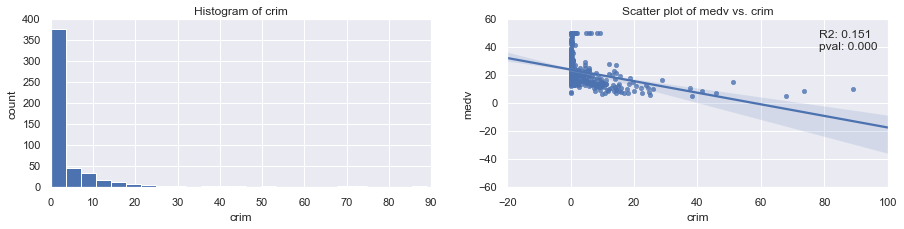

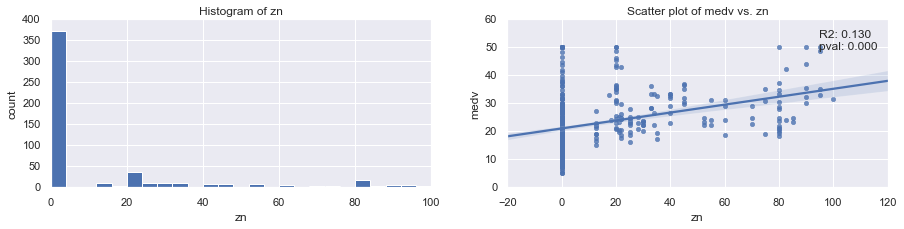

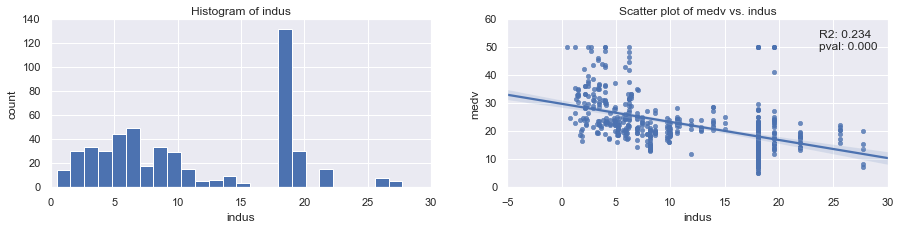

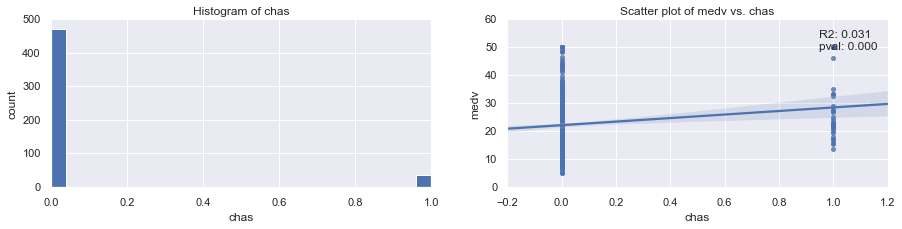

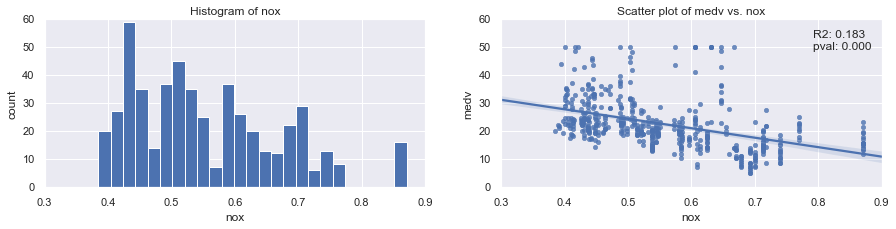

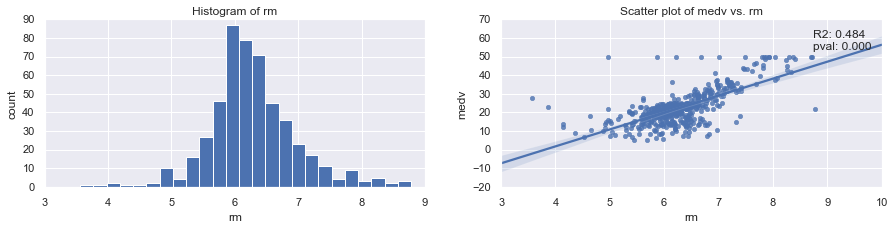

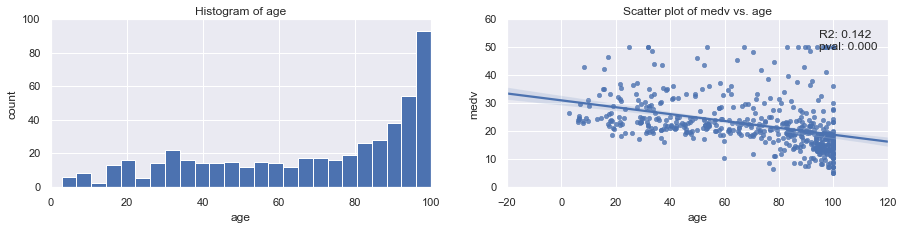

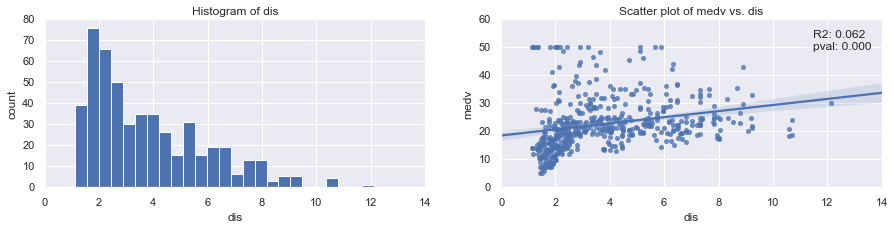

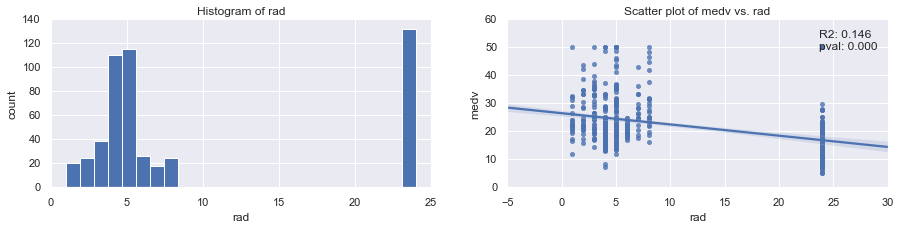

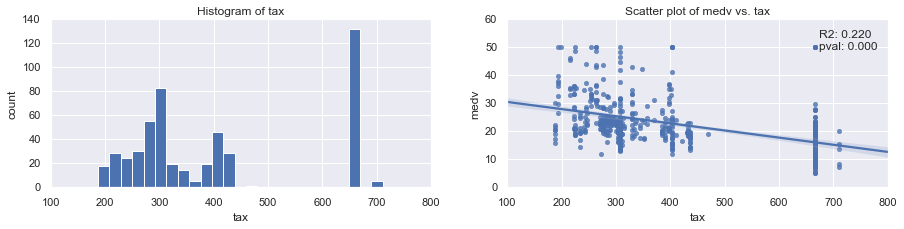

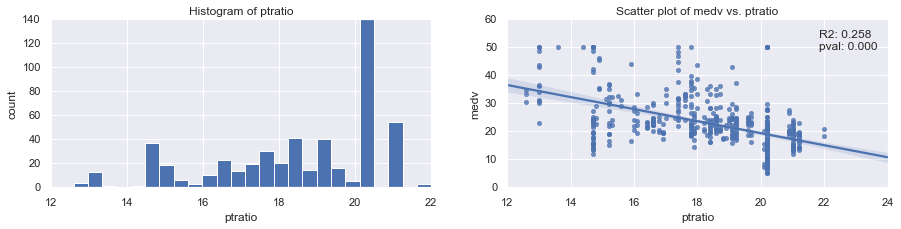

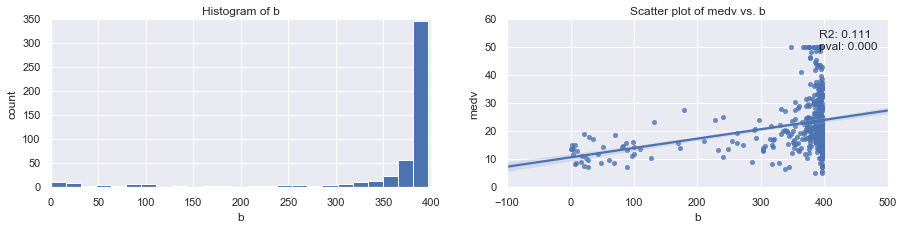

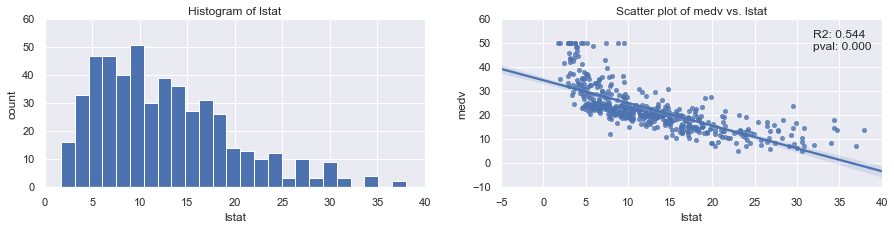

In [15]:
# plot for each feature: (a) a histogram, (b) a scatterplot with medv

for feature in df.drop('medv',axis=1).columns:
    
    # histogram
    plt.subplot(121)
    df[feature].hist(bins=25, figsize=(15,3))
    plt.title('Histogram of {}'.format(feature))
    plt.xlabel(feature)
    plt.ylabel('count')
    
    # scatter plot
    plt.subplot(122)
    formula = 'medv ~ ' + feature
    r = smf.ols(formula=formula, data=df).fit()
    sns.regplot(x=df[feature], y=df['medv'])
    plt.title('Scatter plot of medv vs. ' + feature)
    text = 'R2: {:.3f}\npval: {:.3f}'.format(r.rsquared, r.pvalues[1])
    plt.legend(title=text, frameon=False, labels='');
    
    plt.show();

In [84]:
# Observations:
# The prices increase with RM and decrease with Lstat, but not in a strictly linear way
# There are some outliers and the medv data seem to have a maximum value of 50.

In [85]:
# ToDo: Deal with outliers

## Linear vs. Polynomial Regression

### Simple Cross Validation

In [21]:
# train/test splitting
from sklearn.model_selection import train_test_split

X = pd.DataFrame(np.c_[df['lstat'], df['rm']], columns = ['lstat','rm'])
y = df['medv']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape); print(X_test.shape)
print(Y_train.shape); print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [41]:
# create function to fit linear or polynomial regression and return RMSE/R2 (from Eli)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

def create_polynomial_regression_model(degree):
    "Creates a polynomial regression model for the given degree"
  
    poly_features = PolynomialFeatures(degree=degree)
  
    # transforms the existing features to higher degree features
    X_train_poly = poly_features.fit_transform(X_train)
  
    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, Y_train)
  
    # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train_poly)
  
    # predicting on test data-set
    y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
    # evaluating the model on training dataset
    rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
    r2_train = r2_score(Y_train, y_train_predicted)
  
    # evaluating the model on test dataset
    rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
    r2_test = r2_score(Y_test, y_test_predict)
  
    print("The model performance for the training set")
    print("-------------------------------------------")
    print("RMSE of training set is {:.3f}".format(rmse_train))
    print("R2 score of training set is {:.3f}".format(r2_train))
    print("\n")
    print("The model performance for the test set")
    print("------------------------------------------")
    print("RMSE of test set is {:.3f}".format(rmse_test))
    print("R2 score of test set is {:.3f}".format(r2_test))

In [42]:
create_polynomial_regression_model(1)

The model performance for the training set
-------------------------------------------
RMSE of training set is 5.637
R2 score of training set is 0.630


The model performance for the test set
------------------------------------------
RMSE of test set is 5.137
R2 score of test set is 0.663


In [43]:
create_polynomial_regression_model(2)

The model performance for the training set
-------------------------------------------
RMSE of training set is 4.703
R2 score of training set is 0.743


The model performance for the test set
------------------------------------------
RMSE of test set is 3.785
R2 score of test set is 0.817


In [ ]:
# Polynomial regression performs better than Linear Regression.

### K-fold Cross Validation

In [62]:
from sklearn.model_selection import KFold

def polynomial_regression_Kfold(degree, K):
    "Creates a polynomial regression model for the given degree and performs K-fold CV"
  
    poly_features = PolynomialFeatures(degree=degree)
    kf = KFold(n_splits=K, random_state=0)
    rmse_train, r2_train = 0,0
    rmse_test, r2_test = 0,0
    
    for train_index, test_index in kf.split(X):

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = y[train_index], y[test_index]
    
        # transforms the existing features to higher degree features
        X_train_poly = poly_features.fit_transform(X_train)
  
        # fit the transformed features to Linear Regression
        poly_model = LinearRegression()
        poly_model.fit(X_train_poly, Y_train)
  
        # predicting on training data-set
        y_train_predicted = poly_model.predict(X_train_poly)
  
        # predicting on test data-set
        y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
        # evaluating the model on training dataset
        rmse_train += np.sqrt(mean_squared_error(Y_train, y_train_predicted))/K
        r2_train += r2_score(Y_train, y_train_predicted)/K
  
        # evaluating the model on test dataset
        rmse_test += np.sqrt(mean_squared_error(Y_test, y_test_predict))/K
        r2_test += r2_score(Y_test, y_test_predict)/K
  
    print("The model performance for the training set")
    print("-------------------------------------------")
    print("RMSE of training set is {:.3f}".format(rmse_train))
    print("R2 score of training set is {:.3f}".format(r2_train))
    print("\n")
    print("The model performance for the test set")
    print("------------------------------------------")
    print("RMSE of test set is {:.3f}".format(rmse_test))
    print("R2 score of test set is {:.3f}".format(r2_test))

In [69]:
X = pd.DataFrame(np.c_[df['lstat'], df['rm']], columns = ['lstat','rm'])
y = df['medv']

polynomial_regression_Kfold(2, 10)

The model performance for the training set
-------------------------------------------
RMSE of training set is 4.485
R2 score of training set is 0.759


The model performance for the test set
------------------------------------------
RMSE of test set is 4.623
R2 score of test set is 0.372


In [70]:
polynomial_regression_Kfold(3, 10)

The model performance for the training set
-------------------------------------------
RMSE of training set is 4.360
R2 score of training set is 0.772


The model performance for the test set
------------------------------------------
RMSE of test set is 4.444
R2 score of test set is 0.442


In [71]:
polynomial_regression_Kfold(4, 10)

The model performance for the training set
-------------------------------------------
RMSE of training set is 4.138
R2 score of training set is 0.795


The model performance for the test set
------------------------------------------
RMSE of test set is 6.501
R2 score of test set is -0.143


### Polynomial Regression: Deeper understanding (for one example feature)

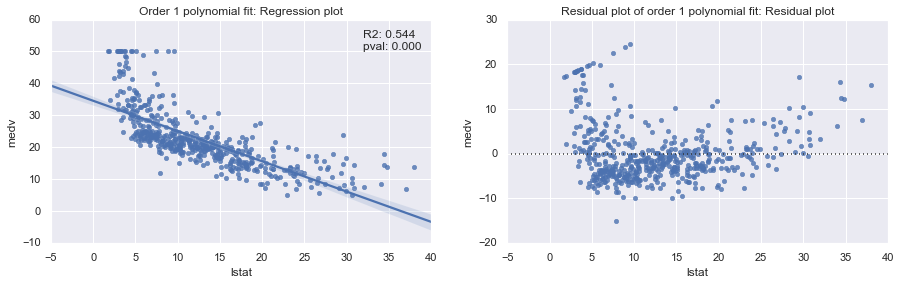

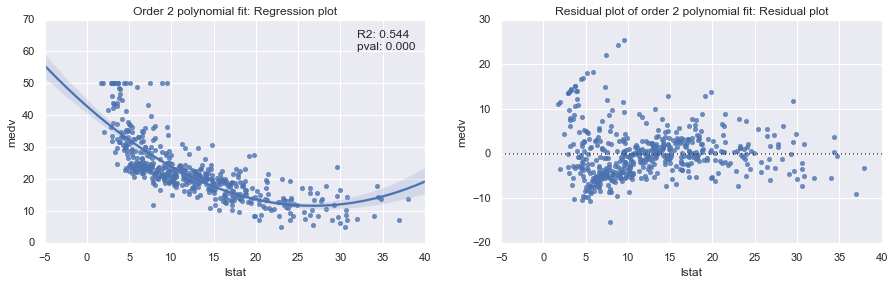

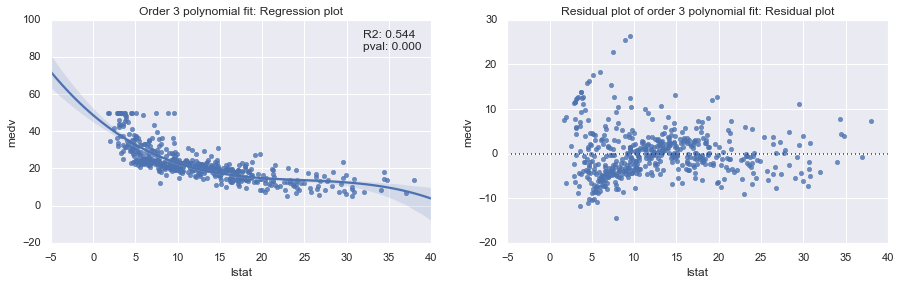

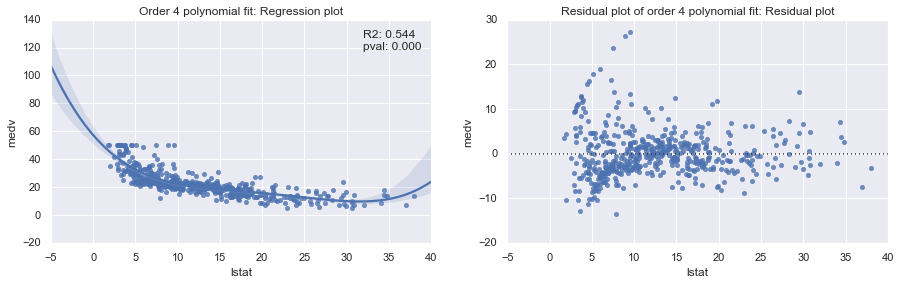

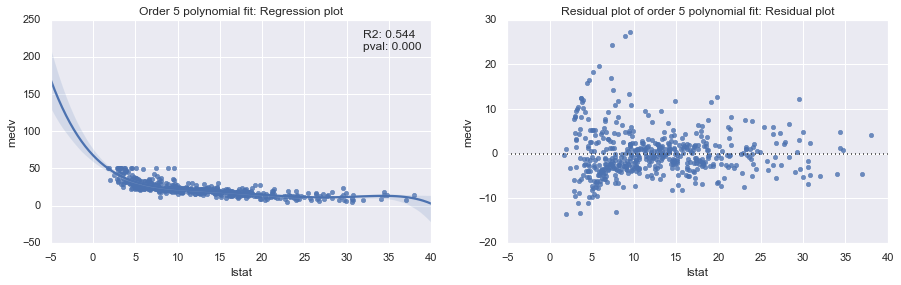

In [72]:
# One of the scatter plots (medv vs. lstat) looks like a first candidate for polynomial regression.
# Let us plot the residualplot next to the scatterplot for polynomial regressions of order 1, 2, 3 and 4.

# Option 1: with Seaborn and Statsmodels

max_order = 5

for o in range(1, max_order+1):    
    fig, ax = plt.subplots(2,max_order, figsize=(15,4))
    
    # Regression plot
    plt.subplot(121)
    r = smf.ols(formula=formula, data=df).fit()
    sns.regplot(x='lstat', y='medv', data=df, order=o)
    plt.title('Order {} polynomial fit: Regression plot'.format(o))
    text = 'R2: {:.3f}\npval: {:.3f}'.format(r.rsquared, r.pvalues[1])
    plt.legend(title=text, frameon=False, labels='')

    # Residual plot
    plt.subplot(122)
    sns.residplot(x='lstat', y='medv', data=df, order=o)
    plt.title('Residual plot of order {} polynomial fit: Residual plot'.format(o))
    plt.show();

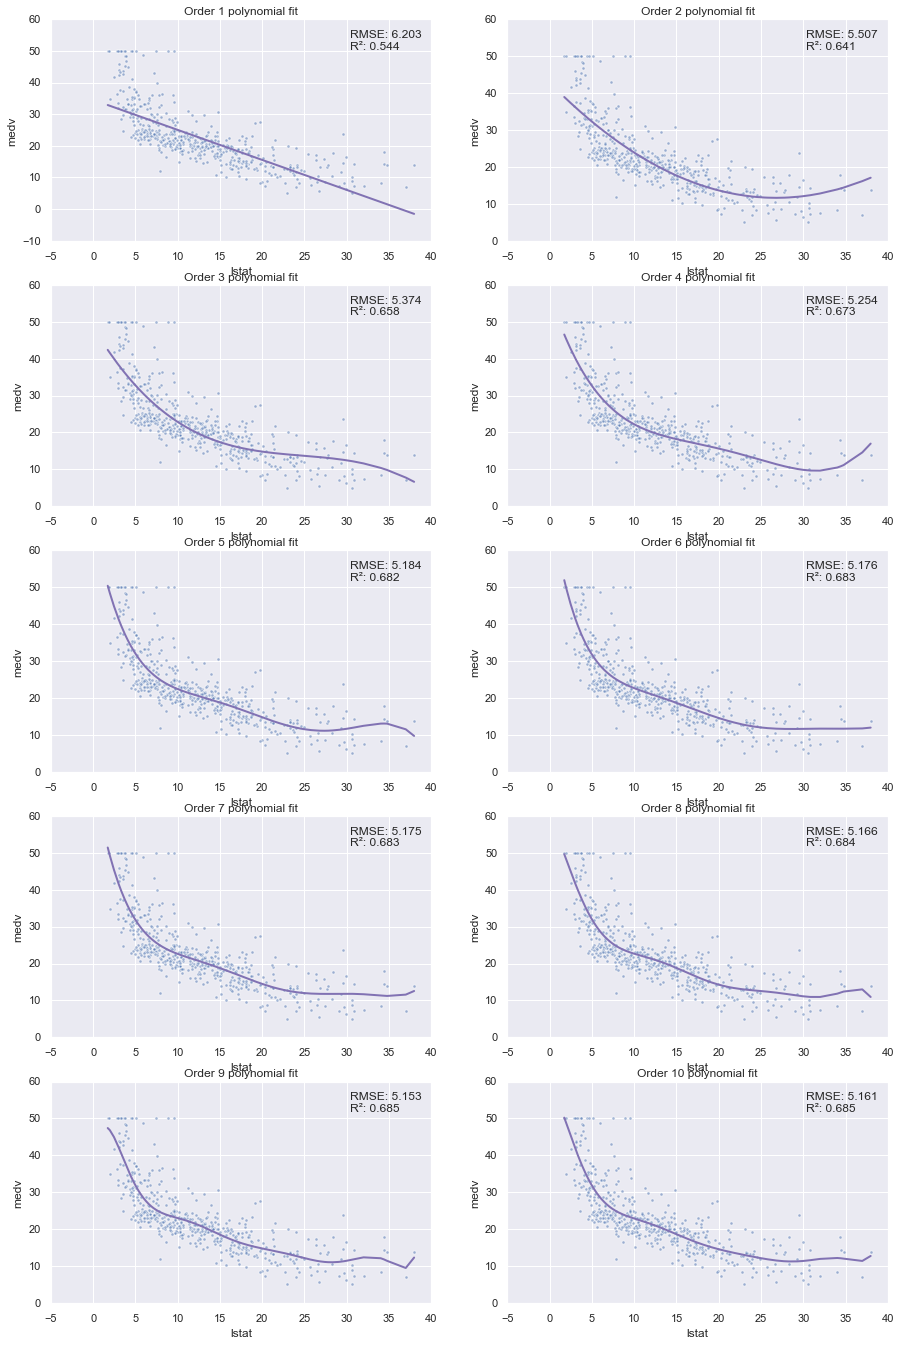

In [73]:
# Option 2: with sklearn

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import operator

x = df.iloc[:,12:13]
y = df.iloc[:,13:14]  # with slicing, we get a pd.DataFrae with 1 column rather than a pd.Series

fig = plt.figure(figsize=(15,23))

for o in range(1,11):
    
    # initiate and fit model, then make predictions
    polynomial_features= PolynomialFeatures(degree=o)  
    x_poly = polynomial_features.fit_transform(x)
    model = LinearRegression()
    model.fit(x_poly, y)
    y_pred = model.predict(x_poly)
    
    # scatter plot
    fig.add_subplot(5,2,o)  # or use: ax = fig.add_subplot(2,2,o) --> then below ax instead of plt
    plt.scatter(x, y, s=10, alpha=0.5)
    plt.xlabel('lstat')
    plt.ylabel('medv')
    
    # add regression line/curve to scatter plot (sort the values of x before line plot)
    xy = pd.DataFrame({'x': x.lstat, 'y': np.squeeze(y_pred)})
    xy.sort_values(by='x',inplace=True)
    plt.plot(xy.x, xy.y, color='m', linewidth=2)
  
    # calculate metrics and add to plot
    rmse = np.sqrt(mean_squared_error(y,y_pred))
    r2 = r2_score(y,y_pred)
    text = 'RMSE: {:.3f}\nR²: {:.3f}'.format(rmse, r2)
    plt.legend(title=text, frameon=False, labels='')
    plt.title('Order {} polynomial fit'.format(o));

We see that with increasing order (model complexity), the RMSE decreases and the R2 increases. To find the 'right' degree of model complexity, we could do a cross validation and check the model scores on the training and testing data.

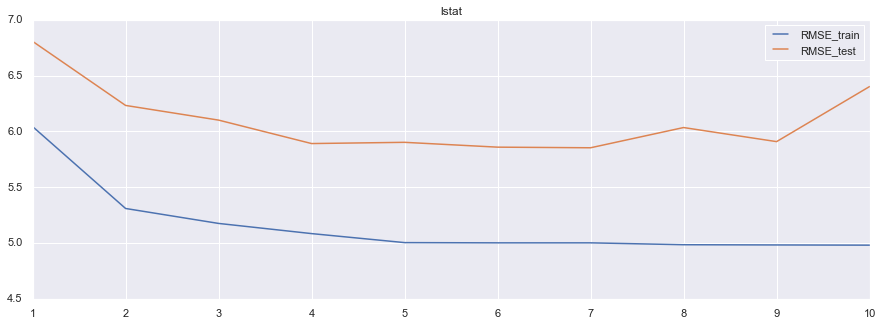

            order 1  order 2  order 3  order 4  order 5  order 6  order 7  \
order         1.000    2.000    3.000    4.000    5.000    6.000    7.000   
R2_test       0.431    0.523    0.543    0.574    0.572    0.578    0.579   
RMSE_test     6.807    6.233    6.101    5.891    5.902    5.859    5.853   
R2_train      0.571    0.669    0.685    0.696    0.706    0.706    0.706   
RMSE_train    6.044    5.309    5.175    5.084    5.003    5.001    5.001   

            order 8  order 9  order 10  
order         8.000    9.000    10.000  
R2_test       0.553    0.571     0.497  
RMSE_test     6.035    5.908     6.402  
R2_train      0.708    0.708     0.709  
RMSE_train    4.985    4.983     4.981  


In [80]:
# Test_Train_Split and Cross Validation
# see: https://www.kaggle.com/jpractice/boston-house-prices-from-sklearn-datasets

from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

feature = 'lstat'
X = df[[feature]]  # df.iloc[:,12:13]  
y = df.medv

def plot_train_test(X, y, max_degree=10):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    summary_df = pd.DataFrame()

    for o in range(1,max_degree+1):
    
        # fit model and make predictions
        polynomial_features= PolynomialFeatures(degree=o)  
        X_train_poly = polynomial_features.fit_transform(X_train)
        X_test_poly = polynomial_features.fit_transform(X_test)
        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        y_pred = model.predict(X_test_poly)
        y_train_pred = model.predict(X_train_poly)

        # get model statistics
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))    
        r2_train = r2_score(y_train, y_train_pred)
        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        #slope, intercept, r_value, p_value, std_err = stats.linregress(y_test,y_pred)
    
        idx = ['order', 'R2_test', 'RMSE_test','R2_train', 'RMSE_train']
        data = np.array([o, r2, rmse, r2_train, rmse_train])
        new_df = pd.DataFrame(data=data, index= idx , columns =['order ' + str(o)])
    
        # add model statistics to summary df
        summary_df = pd.concat([summary_df, new_df], axis=1)
    
    # plot RMSE (root mean squared error) for train and test data for different polynomial fits
    plt.plot(summary_df.loc['order'], summary_df.loc['RMSE_train']);
    plt.plot(summary_df.loc['order'], summary_df.loc['RMSE_test']);
    plt.title(X.columns[0])
    plt.legend()
    plt.show();

    pd.set_option('display.float_format', lambda x: '%.3f' % x)
    print(summary_df)
    
# call function
plot_train_test(X, y)

In [ ]:
# ToDo: make several random splits (e.g. with seed 0-4), show results for all
       # either degree for which RMSE minimal > multimodal?
       # or also degree for which BIC minimal
# ToDo: read about 'ensenble technique' and 'model averaging'
# ToDo: show again scatter plot for polynomial degree with best fit

Based on the CV results, it looks like the order 5-7 degree polynomial fits show the best bias/variance tradeoff - test-RMSE is minimal for degree 7. Let us also do the same for another feature in the dataset.

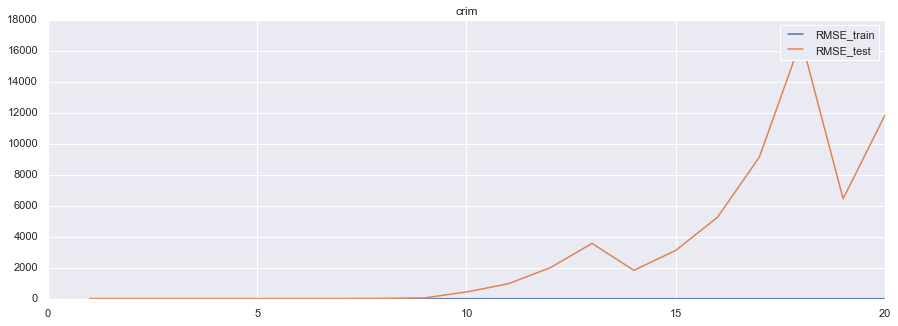

            order 1  order 2  order 3  order 4  order 5  order 6  order 7  \
order         1.000    2.000    3.000    4.000    5.000    6.000    7.000   
R2_test       0.062    0.059    0.045    0.028    0.028   -0.002   -0.013   
RMSE_test     8.740    8.753    8.818    8.899    8.898    9.035    9.083   
R2_train      0.169    0.242    0.255    0.259    0.259    0.260    0.260   
RMSE_train    8.411    8.032    7.966    7.942    7.942    7.935    7.935   

            order 8  order 9  order 10   order 11   order 12    order 13  \
order         8.000    9.000    10.000     11.000     12.000      13.000   
R2_test      -6.615  -43.310 -2381.728 -11590.258 -49183.689 -156884.408   
RMSE_test    24.901   60.067   440.479    971.524   2001.258    3574.204   
R2_train      0.264    0.254     0.239      0.136      0.103       0.080   
RMSE_train    7.915    7.971     8.052      8.579      8.740       8.850   

             order 14    order 15    order 16     order 17     order 18  \
order

In [81]:
feature = 'crim'
X = df[[feature]]  
y = df.medv

plot_train_test(X, y, 20)

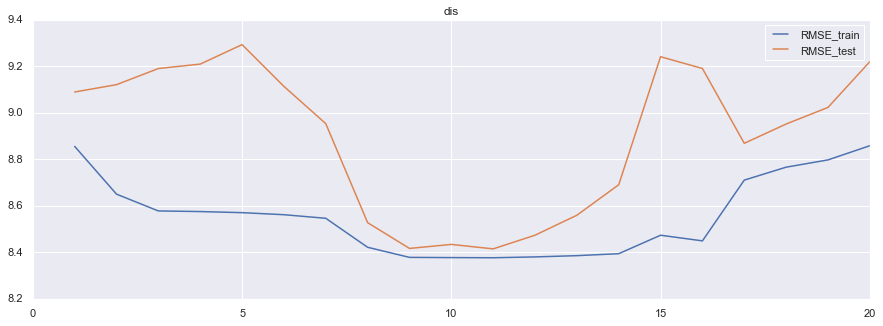

            order 1  order 2  order 3  order 4  order 5  order 6  order 7  \
order         1.000    2.000    3.000    4.000    5.000    6.000    7.000   
R2_test      -0.015   -0.022   -0.037   -0.042   -0.061   -0.020    0.016   
RMSE_test     9.089    9.121    9.190    9.209    9.293    9.114    8.953   
R2_train      0.079    0.121    0.136    0.136    0.137    0.139    0.142   
RMSE_train    8.856    8.650    8.578    8.575    8.571    8.562    8.546   

            order 8  order 9  order 10  order 11  order 12  order 13  \
order         8.000    9.000    10.000    11.000    12.000    13.000   
R2_test       0.107    0.130     0.126     0.130     0.118     0.100   
RMSE_test     8.527    8.417     8.434     8.415     8.474     8.559   
R2_train      0.167    0.176     0.176     0.176     0.175     0.174   
RMSE_train    8.422    8.378     8.377     8.377     8.380     8.386   

            order 14  order 15  order 16  order 17  order 18  order 19  \
order         14.000    15.000

In [82]:
feature = 'dis'
X = df[[feature]]  
y = df.medv

plot_train_test(X, y, 20)

In [ ]:
# let us repeat the above procedure within a pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

degree = np.arange(0, 3)
train_score, test_score = learning_curve(PolynomialRegression(), df[['lstat']], df[['medv']],
                                        'polynomialfeatures__degree', degree, cv=None)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(test_score, 1), color='red', label='testing score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');